### Import packages, including icepyx

In [58]:
from icepyx import icesat2data as ipd
import ipywidgets as wg
from IPython.display import display
import os
import geojson
import shutil
import geopandas as gpd
import matplotlib.pyplot as plt
import shortname
%matplotlib inline

In [15]:
from ipyleaflet import (
    Map,
    basemaps,
    basemap_to_tiles,
    Marker,
    TileLayer,
    WMSLayer,
    Polygon,
    GeoJSON,
    DrawControl,
    projections
)

def handle_draw(target, action, geo_json):
    print(action, geo_json)
    
dc = DrawControl(marker={'shapeOptions': {'color': '#0000FF'}})
dc.on_draw(handle_draw)

polygon = Polygon(
    locations=[(-146.184082, 73.2267), ([)-146.184082, 75.497157], [-134.230957, 75.497157], [-134.230957, 73.2267], [-146.184082, 73.2267],
    color="green",
    fill_color="green"
)

# note that we need to use the same projection for the our layer and the map.
m1 = Map(center=(90, 0),
        zoom=1,
        basemap=basemaps.NASAGIBS.BlueMarble3413,
        crs=projections.EPSG3413)

m1.add_layer(polygon)
m1.add_control(dc)
m1

Map(center=[90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [7]:
short_name = 'ATL03'
spatial_extent = [-180, 70, 180, 90]
date_range = ['2019-06-18','2019-06-19']

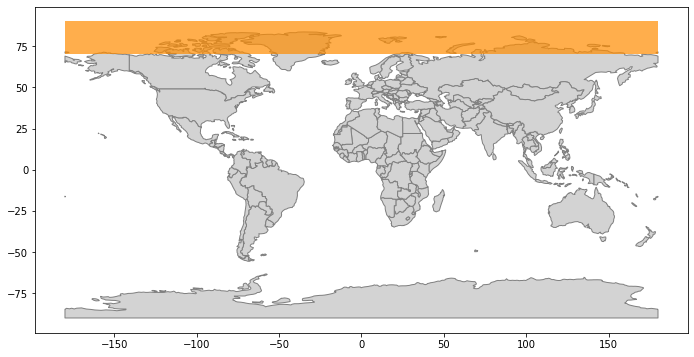

In [8]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)
#region_a.visualize_spatial_extent()

In [9]:
region_a.avail_granules()

{'Number of available granules': 93,
 'Average size of granules (MB)': 1995.8747156204734,
 'Total size of all granules (MB)': 185616.34855270394}

In [20]:
#ipd.parse_var_list()



Dropdown(options=(), value=None)


In [12]:
# We're going to use https://georepository.com/crs_2163/US-National-Atlas-Equal-Area.html
my_projection = {
    'name': 'EPSG:2163',
    'custom': True, #This is important, it tells ipyleaflet that this projection is not on the predefined ones.
    'proj4def': '+proj=laea +lat_0=45 +lon_0=-100 +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs',
    'origin': [-2215235.82, 420644.41],
    'bounds': [
        [-8046094.81, 1819060.18],
        [988364.71, 3511186.72]   
    ],
    'resolutions': [
        8192.0,
        4096.0,
        2048.0,
        1024.0,
        512.0,
        256.0
    ]
}



wms = WMSLayer(
    url='https://ahocevar.com/geoserver/wms',
    layers='ne:NE1_HR_LC_SR_W_DR',
    format='image/png',
    transparent=True,
    min_zoom=0,
    attribution='ahocevar geospatial',
    crs=my_projection # I'm asking this WMS service to reproject the tile layer using EPSG:2163
)

m2 = Map(center=(40, -104),
        zoom=0,
        basemap=basemaps.NASAGIBS.BlueMarble3413,
        #layers=(wms,),
        crs=my_projection)


dc2 = DrawControl(marker={'shapeOptions': {'color': '#0000FF'}})
dc2.on_draw(handle_draw)

m2.add_control(dc2)

m2

Map(center=[40, -104], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [36]:
def shortname():
    names = ['ATL03', 'ATL06', 'ATL07']
    shortname_widget = wg.Dropdown(
        options=names,
        value=names[0],
        description='Short Name:'
    )

    short_name = display(shortname_widget)
    return shortname_widget

In [25]:
wg.Dropdown(
    options=[('ATL03'), ('ATL06'), ('ATL07')],
    value='ATL03',
    description='Short Name:',
)

Dropdown(description='Short Name:', options=('ATL03', 'ATL06', 'ATL07'), value='ATL03')

In [55]:
def click_reset(b):
    print("reset domains button")
    restoreDomains()

resetButton = wg.Button(description="Reset Domains")
resetButton.on_click(click_reset)
#dsply.display(resetButton)

In [74]:
display(shortname_widget)

Dropdown(description='Short Name:', options=('ATL03', 'ATL06', 'ATL07'), value='ATL03')

In [75]:
print(short_name)

None
